====================1 - Использование генерации запросов и ответов через API и ключ OpenAI====================

Для загрузки библиотек и модулей
pip install openai langchain huggingface_hub langchain-openai langchain-community transformers langchain-huggingface -U -q

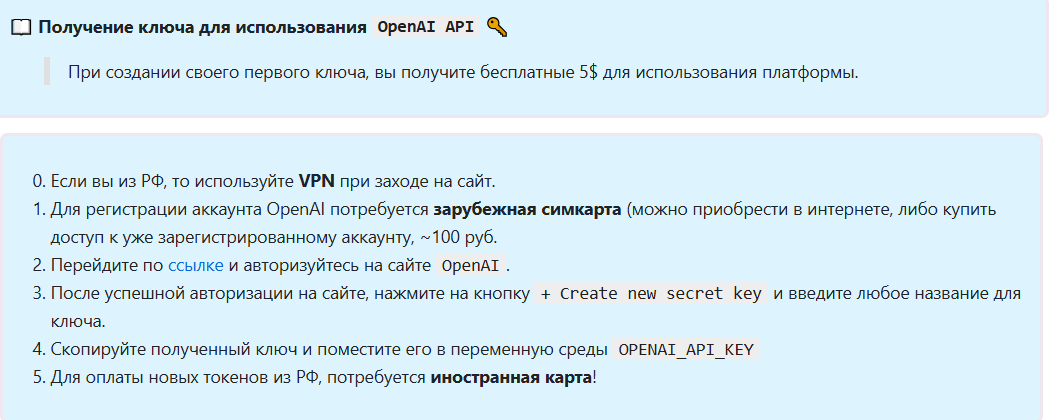

In [ ]:
import os
import warnings
from getpass import getpass  # Для скрытого ввода API ключей
import openai
from openai import OpenAI

openai_api_key = getpass(prompt=f"Введите OpenAI-API ключ: ") #Ввод ключа

client = OpenAI(api_key=openai_api_key) #Создание клиента и подключение

#print(client.models.list()) #Просмотр доступных моделей

messages = [
            {"role" : "user"
             , "content" : "Кто первый человек в космосе"}
             ]

chat_completion = client.chat.completions.create(
    max_tokens=100
    ,model="gpt-3.5-turbo"  #Выбранная модель
    ,messages=messages      #Запрос
    ,temperature=0.3        #Степень креативности ответа
    )


print(chat_completion.choices[0].message.content) #Принт ответа

In [ ]:
#Параметры на вход

# max_tokens - максимальное количество токенов, генерируемых в сообщении

# n - сколько вариантов ответа должно быть сгенерировано для каждого входного сообщения (по умолчанию 1)

# temperature - влияет на степень случайности генерации (принимает значения от 0 до 2, по умолчанию 1). Высокое значение 
# температуры делает вероятности всех слов в выводе более равномерными, что приводит к более случайному
#  и разнообразному тексту. При низком значении температуры модель будет склонна генерировать
#  более предсказуемый и детерминированный текст.

# top_p - тоже влияет на степень случайности генерации. 
# Определяет, какой процент наиболее вероятных слов будет включен в генерацию. 
# Например, если top-p равно 0.8, то модель будет использовать вероятности слов так, 
# чтобы включить в генерацию слова, составляющие 80% верхней части распределения вероятностей.

# Рекомендуем изменять либо параметр temperature, либо top_p, но не оба одновременно

In [ ]:
#Структура ответа

{
  "id": "chatcmpl-8B6YmCk5OiK7Z6RkRrkx72mEQaPGF", #Айди ответа
  "object": "chat.completion",      #Тип возвращаемого объекта
  "created": 1697657516,            #Когда создан
  "model": "gpt-3.5-turbo-0613",    #Название модели
  "choices": [
    {
      "index": 0,               #Индекс ответа
      "message": {
        "role": "assistant",    #Роль
        "content": "1+1 equals 2."  #Ответ
      },
      "finish_reason": "stop"       #Причина остановки запроса (stop - нашел ответ, lenght - макс длина, filter - запрещенка)
    }
  ],
  "usage": {
    "prompt_tokens": 10,    #Кол-во токенов для генерации запроса
    "completion_tokens": 7, #Кол-во токенов для генерации ответа
    "total_tokens": 17      #Суммарно сколько токенов ты потратил
  }
}

====================2 - Использование генерации запросов и ответов через API и ключ OpenAI, но для участников курса====================

In [ ]:
import os
import warnings
from getpass import getpass  # Для скрытого ввода API ключей
import openai
from openai import OpenAI

course_api_key = getpass(prompt=f"Введите OpenAI-API ключ от создателей курса: ") #Ввод ключа
#Это сделано для тех, у кого нет OpenAI ключа, но оч хочется попробовать

client = OpenAI(api_key=course_api_key
                ,base_url="https://aleron-llm.neuraldeep.tech") #Создание клиента и подключение

messages = [
            {"role" : "user"
             , "content" : "Кто первый человек в космосе"}
             ]

chat_completion = client.chat.completions.create(
    max_tokens=100
    ,model="gpt-4o-mini"  #Выбранная модель
    ,messages=messages      #Запрос
    ,temperature=0.1        #Степень креативности ответа
    )


print(chat_completion.choices[0].message.content) #Принт ответа
#Первым человеком в космосе стал Юрий Гагарин. 
# Он совершил свой исторический полет 12 апреля 1961 года на космическом корабле "Восток-1".
#  Полет длился 108 минут, и Гагарин стал символом советской космической программы и важной
#  фигурой в истории освоения космоса.



Первым человеком в космосе стал Юрий Гагарин. Он совершил свой исторический полет 12 апреля 1961 года на космическом корабле "Восток-1". Полет длился 108 минут, и Гагарин стал символом советской космической программы и важной фигурой в истории освоения космоса.


===================3 - Использование генерации запросов и ответов через LangChain и API OpenAI, нужен также свой ключик====================

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

question = 'Кто был первым человеком на Луне'
template = """Вопрос {question} Ответ: дай короткий ответ""" #Шаблон запроса

prompt = PromptTemplate(template=template
                        ,input_variables=['question']) #Создаем промт

open_ai_llm = ChatOpenAI() #Создаем модельку

llm_chain = prompt | open_ai_llm #Создаем цепочку

print(llm_chain.invoke(question).content)    #Принтуем ответ


In [ ]:
===================4 - Использование генерации запросов и ответов через LangChain и API OpenAI, через ключ от курса====================

In [ ]:
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate

question = 'Кто был первым человеком на Луне'
template = """Вопрос {question} Ответ: дай короткий ответ""" #Шаблон запроса

prompt = PromptTemplate(template=template
                        ,input_variables=['question']) #Создаем промт

open_ai_llm = ChatOpenAI(api_key=course_api_key
                         ,model="gpt-4o-mini"
                         ,base_url="https://aleron-llm.neuraldeep.tech") #Создаем модельку

llm_chain = prompt | open_ai_llm #Создаем цепочку

print(llm_chain.invoke(question).content)    #Принтуем ответ
#Первым человеком на Луне был Нил Армстронг.

Первым человеком на Луне был Нил Армстронг.


In [ ]:
===================5 - Использование генерации запросов и ответов через сервис HuggingFace, ключ из твоего ЛК====================

Этот способ позволит тебе протестировать некоторые модельки прежде чем их скачивать
https://huggingface.co/ - ссылка на сервис
https://huggingface.co/models?pipeline_tag=text-generation&inference_provider=hf-inference&sort=trending - список моделек

In [ ]:
from langchain_huggingface import HuggingFaceEndpoint
from langchain.prompts import PromptTemplate

#Инициализация модели
hf_llm = HuggingFaceEndpoint(
    repo_id="SmolLM3-3B", # вводим название модели с HuggingFace
    #repo_id="mistralai/Mistral-Nemo-Base-2407",
    #provider="novita",
    #task='conversational',
    max_new_tokens=50,
    huggingfacehub_api_token="",
)

# build prompt template for simple question-answering
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | hf_llm

question = "When did man first fly into space?"

print(llm_chain.invoke(question))

===================6 - Запуск локально====================

In [17]:
import os
os.environ["HF_HOME"] = "D:\\Khabarov\Репозиторий\\huggingface_cache"  # Указываем диск D

#Код позволяет сменить место для сохранения HuggingFace моделей (А мб и нет)

In [25]:
from langchain_huggingface.llms.huggingface_pipeline import HuggingFacePipeline
from langchain.prompts import PromptTemplate
from transformers import AutoModelForCausalLM, AutoTokenizer, pipeline

#Перед запуском установи pip3 install torch и pip3 install accelerate
#Этот код используй для загрузки модели на локальный диск


# Сначала загрузите модель и токенизатор отдельно
model = AutoModelForCausalLM.from_pretrained(
    # "deepseek-ai/DeepSeek-R1-0528-Qwen3-8B",
    "Qwen/Qwen3-4B-Base",
    device_map="auto",
    torch_dtype="auto",
    trust_remote_code=True,  # Обязательно для кастомных моделей!
    #quantization_config = None
)

# tokenizer = AutoTokenizer.from_pretrained("deepseek-ai/DeepSeek-R1-0528-Qwen3-8B")
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen3-4B-Base")

# Создайте pipeline
pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=64,  # max_length устарел, используйте max_new_tokens
    temperature=0.1
)

# Теперь создайте объект LLM
llm = HuggingFacePipeline(pipeline=pipe)


config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

d:\Khabarov\Репозиторий\llm_practice_course\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in D:\Khabarov\Репозиторий\huggingface_cache\hub\models--Qwen--Qwen3-4B-Base. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


model.safetensors.index.json: 0.00B [00:00, ?B/s]

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model-00001-of-00003.safetensors:   0%|          | 0.00/3.96G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/99.6M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/138 [00:00<?, ?B/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [26]:
question = "Сколько будет 1 + 1"
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | llm


print(llm_chain.invoke(question))

KeyboardInterrupt: 

In [6]:
from langchain_huggingface.llms.huggingface_pipeline import HuggingFacePipeline
from langchain.prompts import PromptTemplate

#А перед этим еще обнови pip3 install ipywidgets
bloom = HuggingFacePipeline.from_model_id(
    model_id="bigscience/bloom-1b7",
    task='text-generation',
    model_kwargs={
                    'temperature':0,
                    'max_length':64,
                },
    device=-0.5,
)

question = "Who killed Kennedy?"
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | bloom


print(llm_chain.invoke(question))
#Все работает

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Device set to use cpu


Question: Who killed Kennedy?.

Answer: A. The government.
B. The media.
C. The CIA.
D. The political leadership.
E. The left.
Hint: The government is the main culprit for the murder of President Kennedy and the CIA, the media, and the left are the main culpr


In [7]:
question = "Кто был первым человеком на луне?"
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | bloom


print(llm_chain.invoke(question))

Question: Кто был первым человеком на луне?.

Answer: Я.

A:

Используйте два варианта написания, одна из которых:

Мой прятельный платформа отправляет


In [ ]:
#Этот код запускает уже локальную модель (по идее), но такое ощущение, что предыдущий код тоже берет существующую модель, если она есть



#А перед этим еще обнови pip3 install ipywidgets
bloom = HuggingFacePipeline.from_model_id(
    model_id=r"C:\Users\n.khabarov\.cache\huggingface\hub\models--bigscience--bloom-1b7\snapshots\cc72a88036c2fb937d65efeacc57a0c2ef5d6fe5",
    task='text-generation',
    model_kwargs={
                    'temperature':0,
                    'max_length':64,
                },
    device=-0.5,
)

question = "Who killed Kennedy?"
template = """Question: {question}.

Answer:"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = prompt | bloom


print(llm_chain.invoke(question))
#Все работает

The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
The following generation flags are not valid and may be ignored: ['temperature']. Set `TRANSFORMERS_VERBOSITY=info` for more details.
Device set to use cpu


Question: Who killed Kennedy?.

Answer: Kennedy was shot by the assassin.

Explanation: Kennedy was killed because he refused to help the traitors.

Answer: They shot him because he refused to help them.

Explanation: They shot him because he refused to help them.

Answer: They shot him because he refused to
